In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import RandomState
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# CLASSIFIERS FOR TRAINING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# 2. Read data

In [107]:
df = pd.read_csv('/Users/ashwinv/Documents/SEM5/dbms/project/train.csv', header = 0)

In [108]:
df.head(7) # look for first 7 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [109]:
df.shape # print size of dataframe

(284807, 31)

In [110]:
# convert from float64 to float32 to reduce memory size
df = df.astype({col: 'float32' for col in df.select_dtypes('float64').columns}) 
df = df.astype({col: 'int32' for col in df.select_dtypes('int64').columns}) 
# df.dtypes # print types of df

# 3. Visualize data
Firstly, lets see **how many records each class have**.

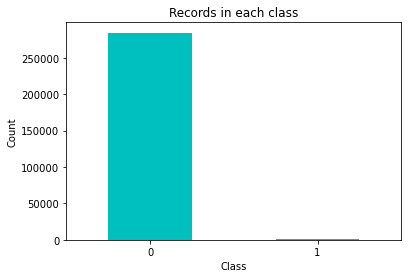

In [111]:
count_classes = df['Class'].value_counts()
plt.title("Records in each class")
count_classes.plot(kind='bar', color='c')
plt.xticks(rotation='horizontal')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

After that we can check, **how many records were in each class during all the time**.

In [112]:
# all time was divided to 4 different intervals
bins = [0, max(df['Time'])/4, max(df['Time'])/2, 3*max(df['Time'])/4, max(df['Time'])] 
time_intervals = pd.cut(df['Time'], bins=bins)

In [113]:
# and then we group data by class
df_grouped2 = df.groupby(['Class', time_intervals]).size().reset_index(name='Count')
df_grouped2

,Class,Time,Count
0,0,"(0.0, 43198.0]",47249
1,0,"(43198.0, 86396.0]",97252
2,0,"(86396.0, 129594.0]",47342
3,0,"(129594.0, 172792.0]",92470
4,1,"(0.0, 43198.0]",146
5,1,"(43198.0, 86396.0]",135
6,1,"(86396.0, 129594.0]",96
7,1,"(129594.0, 172792.0]",115


After that, we can build **bar charts** for each class.

In [114]:
# creating masks
mask1 = df_grouped2['Class']==0
mask2 = df_grouped2['Class']==1

# applying masks
df_sliced1 = df_grouped2.loc[mask1]
df_sliced2 = df_grouped2.loc[mask2]

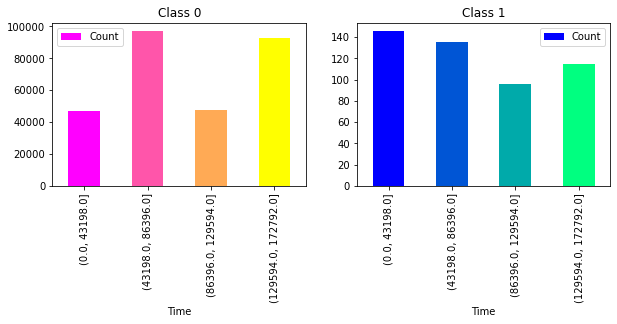

In [115]:
# creating plot with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

# setting colormaps for each subplot
color1 = plt.cm.spring(np.linspace(0, 1, len(df_sliced1['Time'].unique())))
color2 = plt.cm.winter(np.linspace(0, 1, len(df_sliced1['Time'].unique())))

# drawing plots
df_sliced1.plot(x='Time', y='Count', kind = 'bar', color=color1, title='Class 0', ax=axes[0])
df_sliced2.plot(x='Time', y='Count', kind = 'bar', color=color2, title='Class 1', ax=axes[1])

plt.show()

Also, we can **draw boxplots** to see, how the data is distributed.

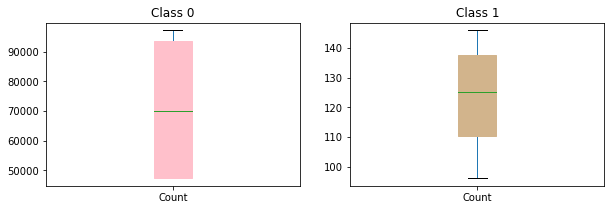

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

# titles for plots
axes[0].title.set_text('Class 0')
axes[1].title.set_text('Class 1')

# colors for drawing boxplots (used for 'patch_artist' below)
color1 = dict(boxes="pink")
color2 = dict(boxes="tan")

bplot1 = df_sliced1.boxplot(column=['Count'], grid=False, ax=axes[0], color=color1, patch_artist=True)
bplot2 = df_sliced2.boxplot(column=['Count'], grid=False, ax=axes[1], color=color2, patch_artist=True)

plt.show()

# 4. Normalize data
We will apply **min-max normalization** for our data.

In [117]:
scaler = MinMaxScaler(feature_range=(0, 1))
normed = scaler.fit_transform(df)
df_normed = pd.DataFrame(data=normed, columns=df.columns)
df_normed.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271797,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


# 5. Split to train and val subsets
Here we're going to split data to train and validation subsets as **70% to 30%** respectively *(parameter frac=70)*.

In [118]:
rng = RandomState()

train = df_normed.sample(frac=0.7, random_state=rng)
val = df_normed.loc[~df_normed.index.isin(train.index)]

train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

In [119]:
print("♦ TRAIN SET:")
train.head(3)

♦ TRAIN SET:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.651975,0.993728,0.761011,0.789840,0.179854,0.780974,0.294268,0.262347,0.793292,0.490593,...,0.557207,0.477710,0.670344,0.482600,0.565364,0.533368,0.415011,0.311555,0.000156,0.0
1,0.284249,0.951668,0.775107,0.863531,0.280745,0.772157,0.261281,0.272608,0.778573,0.448038,...,0.560113,0.521894,0.664265,0.324188,0.573360,0.355543,0.411938,0.306326,0.000778,0.0
2,0.026031,0.908651,0.764450,0.856619,0.402877,0.773111,0.262286,0.270075,0.784457,0.441533,...,0.554606,0.532978,0.684751,0.410703,0.617739,0.484953,0.415929,0.302171,0.003774,0.0


In [120]:
print("♦ VALIDATION SET:")
val.head(3)

♦ VALIDATION SET:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
2,0.000041,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,...,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0.0


# 6. Split dataset to input and output variables (x and y)
Here we can see, that we should predicit *'Class'* variable, so it will be our 'y' and another columns will represent 'x'.

In [121]:
# form 'x' and 'y' data
x_columns = df.columns[1:-1]
y_column = df.columns[-1]

In [129]:
# create 'x' and 'y' data for train
x_raw_train = train[x_columns]
y_raw_train = train[y_column]

X_train = x_raw_train.copy()
Y_train = y_raw_train.copy()

In [131]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.993728,0.761011,0.789840,0.179854,0.780974,0.294268,0.262347,0.793292,0.490593,0.503536,...,0.578928,0.557207,0.477710,0.670344,0.482600,0.565364,0.533368,0.415011,0.311555,0.000156
1,0.951668,0.775107,0.863531,0.280745,0.772157,0.261281,0.272608,0.778573,0.448038,0.513372,...,0.582570,0.560113,0.521894,0.664265,0.324188,0.573360,0.355543,0.411938,0.306326,0.000778
2,0.908651,0.764450,0.856619,0.402877,0.773111,0.262286,0.270075,0.784457,0.441533,0.525370,...,0.567561,0.554606,0.532978,0.684751,0.410703,0.617739,0.484953,0.415929,0.302171,0.003774
3,0.992922,0.766050,0.816429,0.260733,0.766712,0.257252,0.265751,0.783866,0.472910,0.513512,...,0.578130,0.557340,0.480677,0.669650,0.319761,0.561777,0.459428,0.415194,0.311612,0.000077
4,0.979352,0.769762,0.842107,0.283511,0.762403,0.251957,0.265431,0.783942,0.470420,0.503558,...,0.578726,0.556691,0.466314,0.667472,0.424193,0.587479,0.441414,0.415905,0.313724,0.000389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199360,0.954453,0.783282,0.820338,0.288225,0.775827,0.266127,0.281606,0.775728,0.444224,0.505868,...,0.583229,0.559555,0.530873,0.659024,0.378038,0.585183,0.352379,0.415959,0.308794,0.006886
199361,0.808609,0.741989,0.772418,0.251284,0.752441,0.240966,0.256893,0.775707,0.485372,0.468651,...,0.556912,0.529300,0.562554,0.684583,0.537634,0.606947,0.311729,0.457101,0.257099,0.000584
199362,0.977906,0.770019,0.844752,0.313555,0.765245,0.261381,0.266230,0.784587,0.467641,0.505492,...,0.579027,0.560078,0.511087,0.664257,0.396979,0.616864,0.373807,0.417348,0.313510,0.000545
199363,0.976761,0.765749,0.840997,0.310167,0.763161,0.261278,0.264993,0.786872,0.477156,0.511529,...,0.578283,0.559929,0.493948,0.663033,0.376170,0.614383,0.370451,0.416393,0.313321,0.002335


In [132]:
# create 'x' and 'y' data for validation
x_raw_val = val[x_columns]
y_raw_val = val[y_column]

X_val = x_raw_val.copy()
Y_val = y_raw_val.copy()

# 7. Classification itself
Here we are going learn our classificators. 

In [133]:
# list of all classifiers whick will be used for our data
all_classifers = [
    KNeighborsClassifier(2),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

In [134]:
# there we will store accuracies to build plots and for choosing the best classifier
all_acc = {}

In [24]:
classfier_name = KNeighborsClassifier(2)

# train model
model = classifier
model.fit(X_train, Y_train)
filename = '/Users/ashwinv/Documents/SEM5/dbms/project/'+classfier_name+'_model.pickle'
pickle.dump(model, open(filename, 'wb'))  

In [135]:
# learn all classifiers, write accuracy and save trained models in pickle-format

for classifier in all_classifers:
    
    # get the classifier name 
    classfier_name = classifier.__class__.__name__ 
    
    # train model
    model = classifier
    model.fit(X_train, Y_train)
    
    # validate model
#     model_pred = model.predict(X_val)
#     model_acc = accuracy_score(Y_val, model_pred)
    
    # calculate confusion matrix for train and val subsets
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
#     # titles for plots (1 common and 2 for subplots)
#     plt.suptitle(classfier_name, fontsize=14)
#     axes[0].title.set_text('Confusion Matrix (Train)')
#     axes[1].title.set_text('Confusion Matrix (Val)')
#     plot_confusion_matrix(model, X_train, Y_train, cmap=plt.cm.RdPu, ax=axes[0])
#     plot_confusion_matrix(model, X_val, Y_val, cmap=plt.cm.GnBu, ax=axes[1])
    
    
    # save its accuracy
#     all_acc[classfier_name] = model_acc
    
    # save model
    filename = '/Users/ashwinv/Documents/SEM5/dbms/project/'+classfier_name+'_model.pickle'
    pickle.dump(model, open(filename, 'wb'))  
    
#     # load model
#     loaded_model = pickle.load(open(filename, 'rb'))
#     result = loaded_model.score(X_val, Y_val)     
    
#     # print results
#     print("♦ {:<30} = {:<12} {:>10} = {:>12}".format(classfier_name, round(model_acc, 7),
#                                                    "loaded_model score", round(result, 7)))
    
    
    
# plt.show() # show plots in the end 

In [136]:
len(t)

30

In [147]:
import numpy as np
arri = [-2.30334956758553,1.759247460267,-0.359744743330052,2.33024305053917,-0.821628328375422,-0.0757875706194599,0.562319782266954,-0.399146578487216,-0.238253367661746,-1.52541162656194,2.03291215755072,-6.56012429505962,0.0229373234890961,-1.47010153611197,-0.698826068579047,-2.28219382856251,-4.78183085597533,-2.61566494476124,-1.33444106667307,-0.430021867171611,-0.294166317554753,-0.932391057274991,0.172726295799422,-0.0873295379700724,-0.156114264651172,-0.542627889040196,0.0395659889264757,-0.153028796529788,239.93]
t = np.array(arri)
tn = t.reshape(1, -1) 

In [148]:
tn

array([[-2.30334957e+00,  1.75924746e+00, -3.59744743e-01,
         2.33024305e+00, -8.21628328e-01, -7.57875706e-02,
         5.62319782e-01, -3.99146578e-01, -2.38253368e-01,
        -1.52541163e+00,  2.03291216e+00, -6.56012430e+00,
         2.29373235e-02, -1.47010154e+00, -6.98826069e-01,
        -2.28219383e+00, -4.78183086e+00, -2.61566494e+00,
        -1.33444107e+00, -4.30021867e-01, -2.94166318e-01,
        -9.32391057e-01,  1.72726296e-01, -8.73295380e-02,
        -1.56114265e-01, -5.42627889e-01,  3.95659889e-02,
        -1.53028797e-01,  2.39930000e+02]])

In [149]:
modd = ['/Users/ashwinv/Documents/SEM5/dbms/project/LogisticRegression_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/AdaBoostClassifier_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/DecisionTreeClassifier_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/GaussianNB_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/GradientBoostingClassifier_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/KNeighborsClassifier_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/LinearDiscriminantAnalysis_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/QuadraticDiscriminantAnalysis_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/RandomForestClassifier_model.pickle',
'/Users/ashwinv/Documents/SEM5/dbms/project/SVC_model.pickle']


In [150]:
lis = []
for model in modd:
    loaded_model = pickle.load(open(model, 'rb'))
    result = loaded_model.predict(tn)
    result = result.tolist()
    print(type(result))
    lis.append(result)
    

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [151]:
from collections import Iterable
def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
             yield item


In [152]:
li = list(flatten(lis))
li

[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]

In [153]:
import statistics
from statistics import mode
if(mode(li)==1):
    print("fraud")
else:
    print("not fraud")

fraud
